In [283]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np

## generate clean X and y where y_i = sin(x_i)
X = np.linspace(start=0, stop=3.14*2, num=2000).reshape(-1, 1)
y = np.squeeze(np.sin(X))

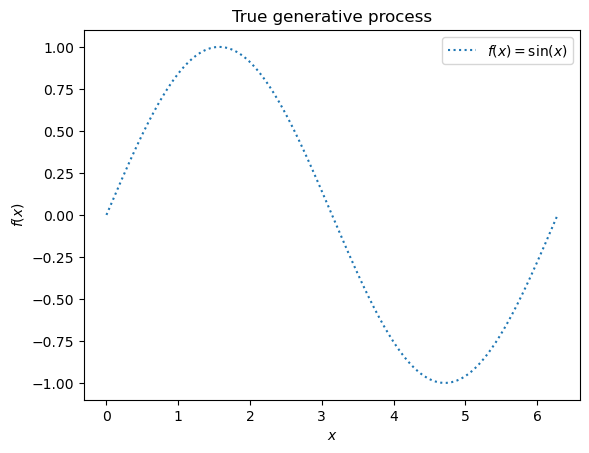

In [3]:
import matplotlib.pyplot as plt

## plot data
plt.plot(X, y, label=r"$f(x) = \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [4]:
## create training data with n1, n2, or n3 points
rng = np.random.RandomState(4)
training_indices_n1 = rng.choice(np.arange(y.size), size=10, replace=False)
training_indices_n2 = rng.choice(np.arange(y.size), size=50, replace=False)
training_indices_n3 = rng.choice(np.arange(y.size), size=1000, replace=False)
X_train_n1, y_train_n1 = X[training_indices_n1], y[training_indices_n1]
X_train_n2, y_train_n2 = X[training_indices_n2], y[training_indices_n2]
X_train_n3, y_train_n3 = X[training_indices_n3], y[training_indices_n3]

In [5]:
## add noise with standard deviation specified by noise_std
noise_std = .1
y_train_noisy_n1 = y_train_n1 + rng.normal(loc=0.0, scale=noise_std, size=y_train_n1.shape)
y_train_noisy_n2 = y_train_n2 + rng.normal(loc=0.0, scale=noise_std, size=y_train_n2.shape)
y_train_noisy_n3 = y_train_n3 + rng.normal(loc=0.0, scale=noise_std, size=y_train_n3.shape)

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## generate kernel and gaussian process models for when there are either n1 or n2 training samples
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e4))

gaussian_process_n1 = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process_n2 = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)

gaussian_process_n1.fit(X_train_n1, y_train_noisy_n1)
gaussian_process_n2.fit(X_train_n2, y_train_noisy_n2)

mean_prediction_n1, std_prediction_n1 = gaussian_process_n1.predict(X, return_std=True)
mean_prediction_n2, std_prediction_n2 = gaussian_process_n2.predict(X, return_std=True)

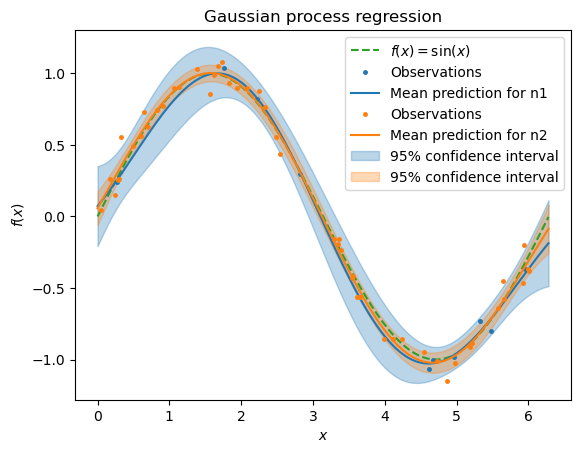

In [7]:

## plot observations, mean predictions, and confidence intervals based on each of the gaussian process models
plt.plot(X, y, label=r"$f(x) = \sin(x)$",color="tab:green",linestyle="dashed") # True function 

plt.plot(X_train_n1, y_train_noisy_n1, linestyle="None", color="tab:blue", marker=".", markersize=5, label="Observations")
plt.plot(X, mean_prediction_n1, label="Mean prediction for n1",color="tab:blue")

plt.plot(X_train_n2, y_train_noisy_n2, linestyle="None", color="tab:orange", marker=".", markersize=5, label="Observations")
plt.plot(X, mean_prediction_n2, label="Mean prediction for n2",color="tab:orange")

plt.fill_between(
    X.ravel(),
    mean_prediction_n1 - 1.96 * std_prediction_n1,
    mean_prediction_n1 + 1.96 * std_prediction_n1,
    color="tab:blue",
    alpha=0.3,
    label=r"95% confidence interval",
)

plt.fill_between(
    X.ravel(),
    mean_prediction_n2 - 1.96 * std_prediction_n2,
    mean_prediction_n2 + 1.96 * std_prediction_n2,
    color="tab:orange",
    alpha=0.3,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression")

In [8]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'